# OS Simulator

##### This project is to simulate the CPU scheduling algorithms, banker’s algorithm, page replacement algorithms

In [2]:
from tabulate import tabulate
import matplotlib.pyplot as plt

In [3]:
def check_in(name):
    while True:
        u = input("Enter "+ name+": ")
        if (u.isnumeric()):
            u = int(u)
            return u
        else:
            print("invalid", name , ", try again\n")

## Scheduling Algorithms

#### Taking Processes From User

In [4]:
def processes_input():
    num_of_processes = input("Enter Number of Processes: ")
    num_of_processes = int(num_of_processes) if num_of_processes.isnumeric() else 0
    processes = []
    
    
        
    # take in arrival and burst times from user for each process 
    for i in range(num_of_processes):
        print("Process", (i+1))
        while True:
            arrival = input("Enter Arrival Time: ")
            if (arrival.isnumeric() or arrival == ""):
                if (arrival == ""):
                    arrival = 0
                else:
                    arrival = int(arrival)
                break
            else:
                print("invalid arrival, try again\n")

        burst = check_in("burst")
    
        # add [process, arrival, burst, waiting, turnaround, progress] as list, in list processses
        processes.append([i+1, arrival, burst, 0, 0, 0])
        
    return processes

#### Processes Computation and Result

In [5]:
def processes_result(processes, gantt_chart):
    # sort based on process number because ORDER is important
    processes.sort(key=lambda x: x[0])
    gantt_chart.sort(key=lambda x: x[0])
    gantt_chart.remove("<") # remove temporary string, because I'm a bad coder :(
    
    num_of_processes = len(processes)
    avg_turnaround = 0
    avg_wait = 0
    
    # computing turnaround for each process, and adding all waitings and turnarounds
    for process in processes:
        avg_wait += process[3]
        process[4] = process[2] + process[3]
        avg_turnaround += process[4]

    # computing avrage turnaround and waiting
    avg_turnaround /= num_of_processes
    avg_wait /= num_of_processes

    # table each process info
    head = ["process number",  "arrival time", "burst time", "waiting time", "turnaround time"]
    print(tabulate(processes, headers=head, tablefmt="grid"))
    
    print("Average Waiting Time: ", avg_wait, "ms\nAverage Turnaround Time:", avg_turnaround, "ms")
    
    print("\nGantt Chart:-")
    fig, ax = plt.subplots(figsize=(10, 6))
    for task in gantt_chart:
        process_name, start_time, end_time = task
        ax.barh(process_name, end_time - start_time, left=start_time, color='skyblue', edgecolor='black')

    ax.set_xlabel("Time in milliseconds")
    ax.set_ylabel("Processes")
    ax.set_title("Gantt Chart")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

### First Come First Serve (FCFS)

In [6]:
def fcfs(processes):
    if(processes is None):
        processes = processes_input()
    num_of_processes = len(processes)
    
    time_elapsed = 0 # for imagiary time, to similute scheduling
    wait = 0 # to calculate wait for each process
    
    completed = [] # list of completed processes
    gantt_chart = ["<"] # list for gantt chart with temprary string
    ready_Q = [] # list of ready processes
    while len(completed) < num_of_processes: # run until all process are done
        
        for process in processes:
            # we don't want processes that haven't arrived, and completed, and already in Q
            if (process[1] <= time_elapsed and process not in completed and process not in ready_Q):
                ready_Q.append(process)
        # check if we have processes ready
        if (len(ready_Q) > 0):
            process = ready_Q[0]

            # gantt chart noting
            process_num = ("p"+str(process[0]))
            if(gantt_chart[-1][0]!= process_num):
                gantt_chart.append([process_num, time_elapsed, time_elapsed+1])
            else:
                gantt_chart[-1][2]+=1

            process[3] = time_elapsed - process[1] - process[5] # computing wait time
            process[5] += 1 # adding 1 to progress of the process
            
            if(process[5] >= process[2]):
                process.pop(-1) # removing progress because everyone hates it
                ready_Q.pop(0)
                completed.append(process) # add process to completed list. YAY!
        time_elapsed +=1 # adding 1 to our imagiary time

    processes_result(processes, gantt_chart)

#### Examples from Lecture Slides

+------------------+----------------+--------------+----------------+-------------------+
|   process number |   arrival time |   burst time |   waiting time |   turnaround time |
+==================+================+==============+================+===================+
|                1 |             10 |           10 |             14 |                24 |
+------------------+----------------+--------------+----------------+-------------------+
|                2 |              0 |           12 |              0 |                12 |
+------------------+----------------+--------------+----------------+-------------------+
|                3 |              3 |            8 |              9 |                17 |
+------------------+----------------+--------------+----------------+-------------------+
|                4 |              5 |            4 |             15 |                19 |
+------------------+----------------+--------------+----------------+-------------------+
|         

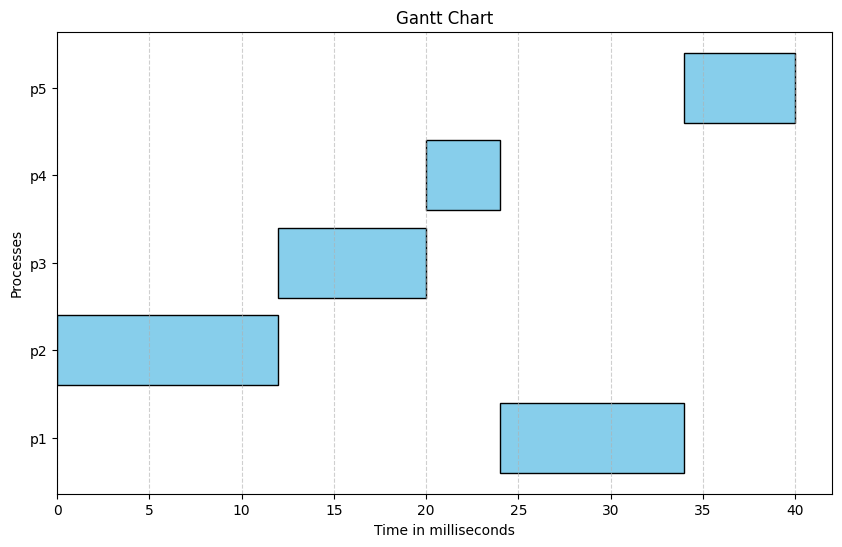

In [7]:

# [i+1, arrival, burst, 0, 0, 0]

#Slide 13: 
#fcfs([[1, 0, 24, 0, 0, 0], [2, 0, 3, 0, 0, 0], [3, 0, 3, 0, 0, 0]])
# result: Average waiting time:  (0 + 24 + 27)/3 = 17 ms, Waiting time for P1  = 0; P2  = 24; P3 = 27 ms

#Slide 14: 
#fcfs([[1, 0, 3, 0, 0, 0], [2, 0, 3, 0, 0, 0], [3, 0, 24, 0, 0, 0]])
# Waiting time for P1 = 6; P2 = 0; P3 = 3 ms, Average waiting time:   (6 + 0 + 3)/3 = 3 ms

#Slide 16:
fcfs([[1, 10, 10, 0, 0, 0], [2, 0, 12, 0, 0, 0], [3, 3, 8, 0, 0, 0], [4, 5, 4, 0, 0, 0], [5, 12, 6, 0, 0, 0]])
#Average waiting time = 60 /5= 12 ms


### Shortest job first (Non-Preemptive)

In [8]:
def sjf_non_preemptive(processes):
    if(processes is None):
        processes = processes_input()
    num_of_processes = len(processes)
    
    time_elapsed = 0 # for imagiary time, to similute scheduling
    wait = 0 # to calculate wait for each process
    
    completed = [] # list of completed processes
    gantt_chart = ["<"] # list for gantt chart with temprary string
    
    ready_Q = [] # ready Q list outside because we want to maintain it elements order
    locked = False # this is to lock a process of other mean processes that wants to join

    
    while len(completed) < num_of_processes: # run until all process are done
        for process in processes:
            # we don't want processes that haven't arrived, and completed, and already in Q
            if (process[1] <= time_elapsed and process not in completed and process not in ready_Q):
                ready_Q.append(process)
        # check if we have processes ready
        if (len(ready_Q) > 0):
            # check if it's locked to switch to another process
            if locked == False:
                ready_Q.sort(key=lambda x: (x[2], x[1])) #  sort based on burst time
                locked = True # YOU SHALL NOT  PASS!
            process = ready_Q[0]

            # gantt chart noting
            process_num = ("p"+str(process[0]))
            if(gantt_chart[-1][0]!= process_num):
                gantt_chart.append([process_num, time_elapsed, time_elapsed+1])
            else:
                gantt_chart[-1][2]+=1
            
            process[3] = time_elapsed - process[1] - process[5] # computing wait time
            process[5] += 1 # adding 1 to progress of the process
            
            if(process[5] >= process[2]):
                process.pop(-1) # removing progress because everyone hates it
                ready_Q.pop(0) # remove the process from ready Q
                locked = False # YOU SHALL PASS
                completed.append(process) # add process to completed list. YAY!
        time_elapsed += 1 # adding 1 to our imagiary time
    processes_result(processes, gantt_chart)

#### Examples from Lecture Slides

+------------------+----------------+--------------+----------------+-------------------+
|   process number |   arrival time |   burst time |   waiting time |   turnaround time |
+==================+================+==============+================+===================+
|                1 |              0 |            8 |              0 |                 8 |
+------------------+----------------+--------------+----------------+-------------------+
|                2 |              1 |            4 |              7 |                11 |
+------------------+----------------+--------------+----------------+-------------------+
|                3 |              2 |            9 |             15 |                24 |
+------------------+----------------+--------------+----------------+-------------------+
|                4 |              3 |            5 |              9 |                14 |
+------------------+----------------+--------------+----------------+-------------------+
Average Wa

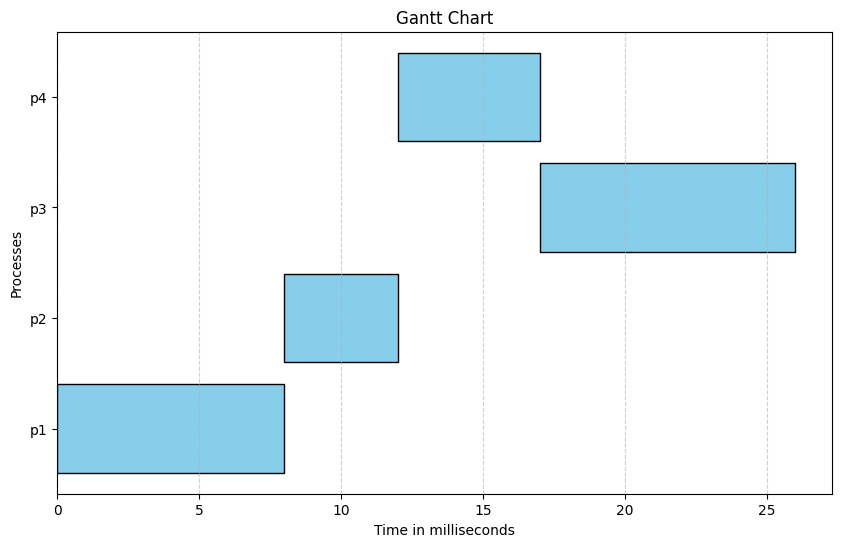

In [9]:

# [i+1, arrival, burst, 0, 0, 0]

#Slide 19: 
#sjf_non_preemptive([[1, 0, 6, 0, 0, 0], [2, 0, 8, 0, 0, 0], [3, 0, 7, 0, 0, 0], [4, 0, 3, 0, 0, 0]])
# result: Average waiting time = (3 + 16 + 9 + 0) / 4 = 7 ms

#Slide 23: 
sjf_non_preemptive([[1, 0, 8, 0, 0, 0], [2, 1, 4, 0, 0, 0], [3, 2, 9, 0, 0, 0], [4, 3, 5, 0, 0, 0]])
# result: Average waiting time = [0+(8-1)+(12-3)+(17-2)]/4=7.75 ms

#Slide 25: 
#sjf_non_preemptive([[1, 10, 10, 0, 0, 0], [2, 0, 12, 0, 0, 0], [3, 3, 8, 0, 0, 0], [4, 5, 4, 0, 0, 0], [5, 12, 6, 0, 0, 0]])
# result: Average waiting time =  = 9.0 ms


### Shortest job first (Preemptive)

In [10]:
def sjf_preemptive(processes):
    if(processes is None):
        processes = processes_input()
    num_of_processes = len(processes)
    
    time_elapsed = 0 # for imagiary time, to similute scheduling
    wait = 0 # to calculate wait for each process
    
    completed = [] # list of completed processes
    gantt_chart = ["<"] # list for gantt chart with temprary string
    
    while len(completed) < num_of_processes:
        ready_Q = []
        for process in processes:
            # we don't want processes that haven't arrived, and completed, and already in Q
            if (process[1] <= time_elapsed and process not in completed and process not in ready_Q):
                ready_Q.append(process)
        # check if we have processes ready
        if (len(ready_Q) > 0):
            ready_Q.sort(key=lambda x: (x[2], x[1])) # always sort by burst time
            process = ready_Q[0] # we always get shotest burst
            
            # gantt chart noting
            process_num = ("p"+str(process[0]))
            if(gantt_chart[-1][0]!= process_num):
                gantt_chart.append([process_num, time_elapsed, time_elapsed+1])
            else:
                gantt_chart[-1][2]+=1
            
            process[3] = time_elapsed - process[1] - process[5] # computing wait time
            process[5] += 1 # adding 1 to progress of the process
            process[2] -= 1 # subtract 1 from burst so we can check for shortest
            if(process[2]<= 0): # process is done when burst is 0
                process[2] = process[5] # retrieve back burst from progress
                process.pop(-1) # progress you're job is done
                completed.append(process) # add process to completed list. YAY!
        time_elapsed += 1 # adding 1 to our imagiary time

    processes_result(processes, gantt_chart)

#### Examples from Lecture Slides

+------------------+----------------+--------------+----------------+-------------------+
|   process number |   arrival time |   burst time |   waiting time |   turnaround time |
+==================+================+==============+================+===================+
|                1 |             10 |           10 |             20 |                30 |
+------------------+----------------+--------------+----------------+-------------------+
|                2 |              0 |           12 |             18 |                30 |
+------------------+----------------+--------------+----------------+-------------------+
|                3 |              3 |            8 |              4 |                12 |
+------------------+----------------+--------------+----------------+-------------------+
|                4 |              5 |            4 |              0 |                 4 |
+------------------+----------------+--------------+----------------+-------------------+
|         

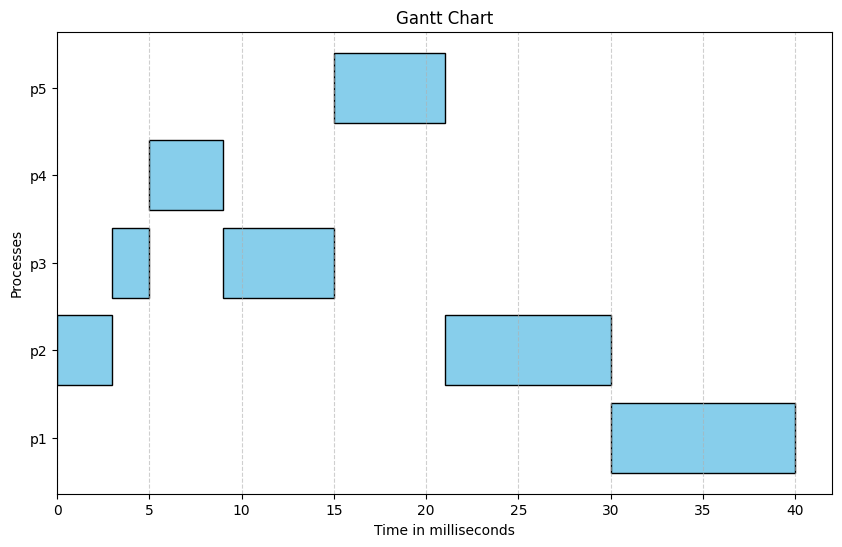

In [11]:

# [i+1, arrival, burst, 0, 0, 0]

#Slide 23: 
#sjf_preemptive([[1, 0, 8, 0, 0, 0], [2, 1, 4, 0, 0, 0], [3, 2, 9, 0, 0, 0], [4, 3, 5, 0, 0, 0]])
# result: Average waiting time = [(10-1)+(1-1)+(17-2)+(5-3)]/4 = 26/4 = 6.5 ms

#Slide 25: 
sjf_preemptive([[1, 10, 10, 0, 0, 0], [2, 0, 12, 0, 0, 0], [3, 3, 8, 0, 0, 0], [4, 5, 4, 0, 0, 0], [5, 12, 6, 0, 0, 0]])
# result: Average waiting time =  = 9.0 ms

### Round Robin

In [12]:
def round_robin(processes, time_q):
    if(processes is None):
        processes = processes_input()

        time_q = check_in("Time Quantum")

    num_of_processes = len(processes)
    
    time_elapsed = 0 # for imagiary time, to similute scheduling
    wait = 0 # to calculate wait for each process
    ready_Q = []
    completed = [] # list of completed processes
    gantt_chart = ["<"] # list for gantt chart with temprary string
    q = 0
    while len(completed) < num_of_processes:
        q +=1
        for process in processes:
            # we don't want processes that haven't arrived, and completed, and already in Q
            if (process[1] <= time_elapsed and process not in completed and process not in ready_Q):
                ready_Q.append(process)
        
        # check if we have processes ready
        if (len(ready_Q) > 0):
            process = ready_Q[0] # we always get shotest burst
            # gantt chart noting
            process_num = ("p"+str(process[0]))
            if(gantt_chart[-1][0]!= process_num):
                gantt_chart.append([process_num, time_elapsed, time_elapsed+1])
            else:
                gantt_chart[-1][2]+=1

            for j in range(1, len(ready_Q)):
                ready_Q[j][3] += 1
                
            process[5] += 1 # adding 1 to progress of the process
            
            if(process[5] >= process[2]): # process is done when burst == progress
                process.pop(-1) # progress you're job is done
                ready_Q.pop(0)
                completed.append(process) # add process to completed list. YAY!
                q = 0
                
            elif(q  % time_q == 0): # check if time q has passed to change process
                temp = ready_Q.pop(0)
                ready_Q.append(temp)
                q = 0
        
        time_elapsed += 1 # adding 1 to our imagiary time
    

            
    processes_result(processes, gantt_chart)
    

#### Examples from Lecture Slides

+------------------+----------------+--------------+----------------+-------------------+
|   process number |   arrival time |   burst time |   waiting time |   turnaround time |
+==================+================+==============+================+===================+
|                1 |              0 |           12 |             27 |                39 |
+------------------+----------------+--------------+----------------+-------------------+
|                2 |              0 |            8 |             24 |                32 |
+------------------+----------------+--------------+----------------+-------------------+
|                3 |              0 |            4 |             10 |                14 |
+------------------+----------------+--------------+----------------+-------------------+
|                4 |              0 |           10 |             27 |                37 |
+------------------+----------------+--------------+----------------+-------------------+
|         

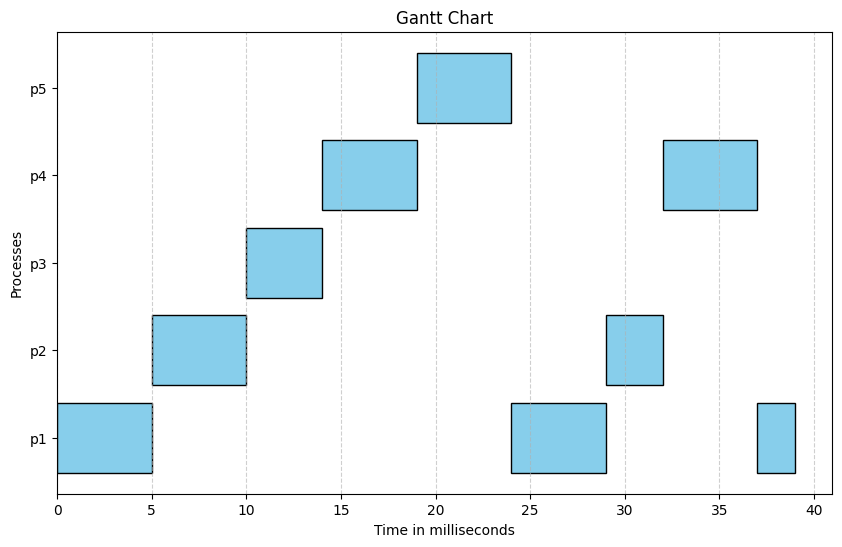

In [13]:
#Slide 33:
#round_robin([[1, 0, 24, 0, 0, 0], [2, 0, 3, 0, 0, 0], [3, 0, 3, 0, 0, 0]], 4)
# Result: Avg. Wait Time = (6+4+7)/3 = 5.66666666667

#Slide 35:
round_robin([[1, 0, 12, 0, 0, 0], [2, 0, 8, 0, 0, 0], [3, 0, 4, 0, 0, 0], [4, 0, 10, 0, 0, 0], [5, 0, 5, 0, 0, 0]], 5)
# Result: Avg. Wait Time = 107/5 = 21.4

## Deadlock Avoidance Algorithm

#### Taking inputs for bankers

In [14]:
def take_banker():

    num_of_processes = check_in("Number of Processes")


    num_of_resources = check_in("Number of Resources")
    instances_per_resources = []
    
    print("\nThe number of instances for each resource:-")
    for i in range(num_of_resources):
        print("Resource", i+1)
        instance = check_in("Number of Instances")

    allocations = []
    print("\nThe Allocation Matrix (row by row):-")
    for i in range(num_of_processes):
        print("Allocation for process", i)
        alloc = check_in("allocation")
        alloc = list(str(alloc))
        temp = []
        for j in alloc:
            temp.append(int(j))
        allocations.append(temp)
        
    maxis = []
    print("\nThe Max Matrix (row by row):-")
    for i in range(num_of_processes):
        print("Max for process", i)
        max = check_in("max")
        max = list(str(max))
        temp = []
        for j in max:
            temp.append(int(j))
        maxis.append(temp)
        
    available = check_in("available vector")
    available = list(str(available))
    temp = []
    for i in available:
        temp.append(int(i))
    available = temp

    return num_of_processes, num_of_resources, instances_per_resources, allocations, maxis, available

### Banker’s Algorithm

In [15]:
def bankers(num_of_processes, num_of_resources, instances_per_resources, allocations, maxis, available):
    if num_of_processes is None:
        num_of_processes, num_of_resources, instances_per_resources, allocations, maxis, available = take_banker()
    
    og_available = available.copy()
    need =[]
    for i in range(num_of_processes):
        temp = []
        for j in range(num_of_resources):
             temp.append(maxis[i][j] - allocations[i][j])
        need.append(temp)
        
    completed = []  # Track completed processes
    safe_sequence = []  # Store the safe sequence
    available_list = []

    while len(completed) < num_of_processes:
        process_executed = False

        for i in range(num_of_processes):
            
            # Skip if process is already completed
            if i in completed:
                continue

            # Check if the process can safely execute
            if all(need[i][j] <= available[j] for j in range(num_of_resources)):
                available_list.append([i, available.copy()])
                # Update available resources
                for j in range(num_of_resources):
                    available[j] += allocations[i][j]

                # Mark process as completed
                completed.append(i)
                safe_sequence.append("P"+str(i))
                process_executed = True

        # If no process executes in an iteration, the system is unsafe
        if not process_executed:
            print("System is in an unsafe state. Deadlock detected.")
            return
        available_list.append(available)

    
    # Output the results
    print("\nSafe sequence is:", " -> ".join(safe_sequence))
    
    available_list = [i for i in available_list if i != instances_per_resources] 
    available_list.sort(key=lambda x: x[0])
    table = []
    for i in range(num_of_processes):
        if (i == 0):
            row = [f"P{i}", allocations[i], maxis[i], og_available, need[i]]
        else:
            row = [f"P{i}", allocations[i], maxis[i], "", need[i]]
        table.append(row)
    

    head = ["Process", "Allocation",  "Max", "Available", "Need"]
    print(tabulate(table, headers=head, tablefmt="grid"))
    
    while True:
        quesion = input("would you like to see if a request can be granted or not. (y/n)")
        if (quesion == "y"):
            r = True
            p_num = check_in("process number")
            request = check_in("request")
            request = list(str(request))
            for i in range(len(request)):
                
                if(int(request[i]) > available_list[p_num][1][i]):
                    r = False
            print(r)
        elif (quesion == "n"):
            break
        else:
            break
    
        


#### Examples from Lecture Slides

In [ ]:
# Slide 29:
bankers(5, 3, [10, 5, 7], [[0, 1, 0], [2, 0, 0], [3, 0, 2], [2, 1, 1], [0, 0, 2]], [[7, 5, 3], [3, 2, 2], [9, 0, 2], [2, 2, 2], [4, 3, 3]], [3,3,2])
#Slide 32?

## Page Replacement Algorithms

#### Reading Frames and Reference String

In [17]:
def feed_me_inputs():
    num_of_frames = check_in("Number of frames")
    
    reference_string = list(input("Enter reference_string: "))
    return num_of_frames, reference_string

#### Show results

In [18]:
def show(page_frames, miss, hit, reference_string):
    fliped_list = []
    for i in range(len(page_frames[0])):
        row =[]
        for item in page_frames:
            row.append(item[i])
        fliped_list.append(row)
    
    print(tabulate(fliped_list, headers=reference_string, tablefmt="grid"))
    print("Page Faults: ", miss)
    print("Hit and Miss Ratio:-")
    print("Miss Ratio: ", miss/len(reference_string))
    print("hit Ratio: ", hit/len(reference_string))

### First in First out (FIFO)

In [19]:
def fifo(num_of_frames, reference_string):
    if(num_of_frames is None):
        num_of_frames, reference_string = feed_me_inputs()

    frame = []
    for i in range(num_of_frames):
        frame.append(None)

    page_frames = []
    hit = 0
    miss = 0
    index = 0
    for i in reference_string:
        
        index = index % num_of_frames
        if i in frame:
            hit += 1
            
        else:
            miss += 1
            if None in frame:
                frame[frame.index(None)] = i
            else:
                frame[index] = i
            index += 1
        
        page_frames.append(frame.copy())
        
    show(page_frames, miss, hit, reference_string)
    
    


#### Examples from Lecture Slides

In [20]:
#Slide 22:
#fifo(3, list("70120304230302120701"))
fifo(1, "70120304230321201701")
fifo(2, "70120304230321201701")
fifo(3, "70120304230321201701")
fifo(4, "70120304230321201701")
fifo(5, "70120304230321201701")
fifo(6, "70120304230321201701")
fifo(7, "70120304230321201701")
# 15 page faults

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   7 |   0 |   1 |   2 |   0 |   3 |   0 |   4 |   2 |   3 |   0 |   3 |   2 |   1 |   2 |   0 |   1 |   7 |   0 |   1 |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   7 |   0 |   1 |   2 |   0 |   3 |   0 |   4 |   2 |   3 |   0 |   3 |   2 |   1 |   2 |   0 |   1 |   7 |   0 |   1 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
Page Faults:  20
Hit and Miss Ratio:-
Miss Ratio:  1.0
hit Ratio:  0.0
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   7 |   0 |   1 |   2 |   0 |   3 |   0 |   4 |   2 |   3 |   0 |   3 |   2 |   1 |   2 |   0 |   1 |   7 |   0 |   1 |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+==

### Least Recent Used (LRU)

In [21]:
def lru(num_of_frames, reference_string):
    if(num_of_frames is None):
        num_of_frames, reference_string = feed_me_inputs()

    frame = []
    for i in range(num_of_frames):
        frame.append(None)

    page_frames = []
    hit = 0
    miss = 0
    oldest = []
    for i in reference_string:
        if i in frame:
            hit += 1
            oldest.remove(i)
            oldest.append(i)
        else:
            miss += 1
            if None in frame:
                frame[frame.index(None)] = i
                oldest.append(i)
            else:
                index = frame.index(oldest[0])
                oldest.pop(0)
                frame[index] = i
                oldest.append(i)
            
        
        page_frames.append(frame.copy())

    show(page_frames, miss, hit, reference_string)
    


#### Examples from Lecture Slides

In [22]:
#Slide 25:
#lru(3, list("70120304230302120701"))
# 12 page faults
lru(4, "70120304230321201701")

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   7 |   0 |   1 |   2 |   0 |   3 |   0 |   4 |   2 |   3 |   0 |   3 |   2 |   1 |   2 |   0 |   1 |   7 |   0 |   1 |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   7 |   7 |   7 |   7 |   7 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   7 |   7 |   7 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     |     |   1 |   1 |   1 |   1 |   1 |   4 |   4 |   4 |   4 |   4 |   4 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |
+-----+-----+-----+-----

### Optimal

In [23]:
def optimal(num_of_frames, reference_string):
    if(num_of_frames is None):
        num_of_frames, reference_string = feed_me_inputs()

    frame = []
    for i in range(num_of_frames):
        frame.append(None)

    page_frames = []
    hit = 0
    miss = 0
    for i in reference_string:
        if i in frame:
            hit += 1
        else:   
            miss += 1
            if None in frame:
                frame[frame.index(None)] = i
            else:
                farthest_use_index = -1
                farthest_use = -1
                for j, elem in enumerate(frame):
                    try:
                        next_use = reference_string.index(elem, reference_string.index(i) + 1)  # Look ahead
                    except ValueError:  # If the page is not found again, treat it as "not used anymore"
                        next_use = float('inf')
                    
                    if next_use > farthest_use:
                        farthest_use = next_use
                        farthest_use_index = j
                
                # Replace the page at the farthest_use_index
                frame[farthest_use_index] = i
        
        page_frames.append(frame.copy())
        
    show(page_frames, miss, hit, reference_string)
    
    


#### Examples from Lecture Slides

In [24]:
#Slide 25:
optimal(4, "70120304230321201701")#(3, list("70120304230302120701"))
# 12 page faults

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   7 |   0 |   1 |   2 |   0 |   3 |   0 |   4 |   2 |   3 |   0 |   3 |   2 |   1 |   2 |   0 |   1 |   7 |   0 |   1 |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   7 |   7 |   7 |   7 |   7 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   3 |   7 |   7 |   7 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     |     |   1 |   1 |   1 |   1 |   1 |   4 |   4 |   4 |   4 |   4 |   4 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |
+-----+-----+-----+-----

## Menu

In [26]:
keepGoing = True
while (keepGoing == True):
    print("Chose an Algorithm by entering a number: ")
    print("Scheduling Algorithms")
    print("1. First Come First Serve (FCFS)")
    print("2. Shortest Job First (Non-Preemptive)")
    print("3. Shortest Job First (Preemptive)")
    print("4. Round Robin")
    print("Deadlock Avoidance Algorithm")
    print("5. Banker's Algorithm")
    print("Page Replacement Algorithms")
    print("6. First in First out (FIFO)")
    print("7. Least Recent Used (LRU)")
    print("8. Optimal")
    print("9. Exit")
    choice = int(input("Enter your choice: "))
    if choice == 1:
        fcfs(None)
    elif choice == 2:
        sjf_non_preemptive(None)
    elif choice == 3:
        sjf_preemptive(None)
    elif choice == 4:
        round_robin(None, 0)
    elif choice == 5:
        bankers(None,0,0,0,0,0)
    elif choice == 6:
        fifo(None, None)
    elif choice == 7:
        lru(None, None)
    elif choice == 8:
        optimal(None, None)
    elif choice == 9:
        print("WE ARE DONE, GET OUT OF HERE!")
        keepGoing = False
    else:
        print("\nInvalid choice! Please try again.\n")
    

Chose an Algorithm by entering a number: 
Scheduling Algorithms
1. First Come First Serve (FCFS)
2. Shortest Job First (Non-Preemptive)
3. Shortest Job First (Preemptive)
4. Round Robin
Deadlock Avoidance Algorithm
5. Banker's Algorithm
Page Replacement Algorithms
6. First in First out (FIFO)
7. Least Recent Used (LRU)
8. Optimal
9. Exit


KeyboardInterrupt: Interrupted by user